In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

In [2]:
pip install streamlit_drawable_canvas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42)

In [4]:
# SGD Classifier with hinge loss (SVM)
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
import joblib
joblib.dump(rf, "random_forest_model.pkl")

['random_forest_model.pkl']

SGD Accuracy: 0.8691
Random Forest Accuracy: 0.9674

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



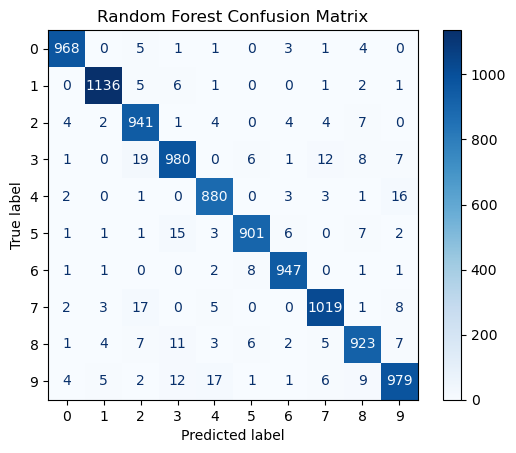

In [6]:
#Evaluate with confusion matrix & classification report
from sklearn.metrics import accuracy_score

# Predictions
sgd_preds = sgd.predict(X_test)
rf_preds = rf.predict(X_test)

# Evaluation
print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_preds))

# Confusion Matrix (Random Forest)
ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, cmap='Blues', normalize=None)
plt.title("Random Forest Confusion Matrix")
plt.show()

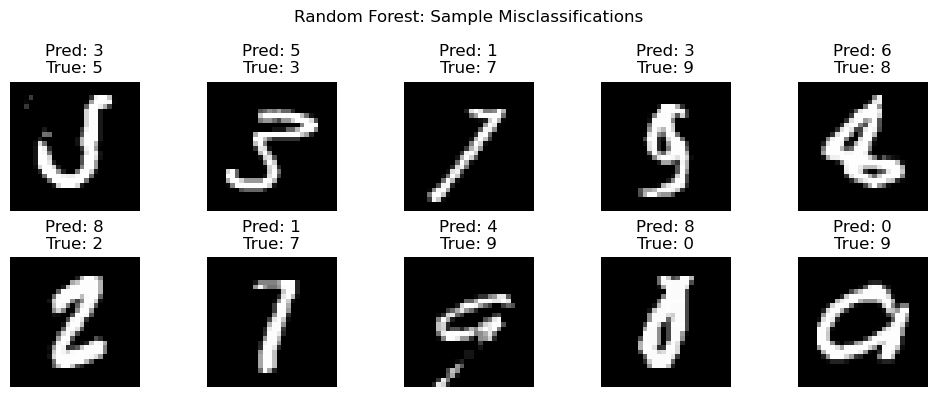

In [7]:
#Visualize worst misclassifications (Random Forest)

# Get incorrect predictions
errors = rf_preds != y_test
X_errors = X_test[errors]
y_errors = y_test[errors]
preds_errors = rf_preds[errors]

# Pick 10 random errors
idxs = np.random.choice(len(X_errors), 10, replace=False)
plt.figure(figsize=(10, 4))
for i, idx in enumerate(idxs):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_errors[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {preds_errors[idx]}\nTrue: {y_errors[idx]}")
    plt.axis("off")
plt.suptitle("Random Forest: Sample Misclassifications")
plt.tight_layout()
plt.show()

In [8]:
pip install streamlit pillow numpy scikit-learn streamlit-drawable-canvas

Note: you may need to restart the kernel to use updated packages.


In [12]:
import streamlit as st
from PIL import Image, ImageOps
import numpy as np
from streamlit_drawable_canvas import st_canvas

# Optional: Load trained model from file
import joblib
rf = joblib.load("random_forest_model.pkl")

st.set_page_config(page_title="Digit Classifier", layout="centered")
st.title("🧠 MNIST Digit Classifier (Random Forest)")
st.write("Draw a digit OR upload an image. The model will predict the digit (0–9).")

# === 1. Drawing Canvas ===
st.subheader("✍️ Draw a Digit")
canvas_result = st_canvas(
    fill_color="#000000",
    stroke_width=10,
    stroke_color="#FFFFFF",
    background_color="#000000",
    height=280,
    width=280,
    drawing_mode="freedraw",
    key="canvas",
)

# === 2. Image Upload ===
st.subheader("📤 Or Upload a Digit Image")
uploaded_file = st.file_uploader("Choose an image file...", type=["png", "jpg", "jpeg"])

image = None

if uploaded_file:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=False)

elif canvas_result.image_data is not None:
    # Convert canvas image to PIL
    image = Image.fromarray(np.uint8(canvas_result.image_data)).convert("L")
    st.image(image, caption="Drawn Digit", use_column_width=False)

# === 3. Prediction ===
if image is not None:
    # Preprocess: resize and invert
    img_resized = ImageOps.invert(image).resize((28, 28))
    arr = np.array(img_resized).reshape(1, -1)

    if "rf" in globals():
        prediction = rf.predict(arr)[0]
        st.success(f"✅ Predicted Digit: {prediction}")
    else:
        st.error("❌ Random Forest model (`rf`) is not loaded. Please define or load it.")

2025-07-27 03:58:47.975 
  command:

    streamlit run C:\Users\Dell\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_improved = RandomForestClassifier(n_estimators=100, random_state=42)
rf_improved.fit(X_train_scaled, y_train)
improved_preds = rf_improved.predict(X_test_scaled)

print("Improved Accuracy:", accuracy_score(y_test, improved_preds))